In [199]:
import torch
from transformers import BertTokenizer, BertModel
import pandas as pd
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import koreanize_matplotlib
import ast
import re
import networkx as nx
from pprint import pprint
import math

## Embedding

In [2]:
model_path  = r"C:\Users\gospe\OneDrive\바탕 화면\학교\4-2\디지털인문학\BERT_CCPoem_v1"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertModel.from_pretrained(model_path)

In [3]:
# tqdm 설정을 위해 apply 함수에 적용할 래퍼 함수 정의
def apply_progress_bar(series, func):
    tqdm.pandas()  # tqdm의 progress_apply 기능 활성화
    return series.progress_apply(func)

# 내용 컬럼을 임베딩하여 결과를 반환하는 함수
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # BERT의 [CLS] 토큰 임베딩을 문장 임베딩으로 사용
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

# 파일 경로를 받아서 데이터프레임을 불러오고 임베딩 컬럼을 추가하는 함수
def embed_data(file_path):
    # 파일 읽기
    df = pd.read_csv(file_path)

    # tqdm 적용하여 내용 컬럼 임베딩 후 임베딩 컬럼 추가
    df['임베딩'] = apply_progress_bar(df['본문_간체'], get_embedding)

    return df

### 두보 embedding

In [4]:
file_path = r'C:\Users\gospe\OneDrive\바탕 화면\학교\4-2\디지털인문학\연구\두보\최종_두보_최종_데이터v2.csv'
df_두보 = embed_data(file_path)
df_두보

100%|██████████| 18280/18280 [06:25<00:00, 47.42it/s]


,제목,편수,본문_번체,본문_간체,시체,길이(자수),임베딩
0,遊龍門奉先寺,제1수,已從招提遊,已从招提游,5언율시,5,"[1.3570647, 0.32766816, 0.42198172, 0.2923095,..."
1,遊龍門奉先寺,제1수,更宿招提境,更宿招提境,5언율시,5,"[1.0807601, 0.1329932, -0.09779569, 0.07579584..."
2,遊龍門奉先寺,제1수,陰壑生虛籟,阴壑生虚籁,5언율시,5,"[0.59942997, 0.13847856, -0.12173541, -0.51722..."
3,遊龍門奉先寺,제1수,月林散淸影,月林散淸影,5언율시,5,"[1.4217845, 0.022379048, -0.22336955, -0.00141..."
4,遊龍門奉先寺,제1수,天闕象緯逼,天阙象纬逼,5언율시,5,"[1.5746888, 0.050457913, -0.13868265, -0.25738..."
...,...,...,...,...,...,...,...
18275,風疾舟中伏枕書懷 三十六韻 奉呈湖南親友,제1수,軍聲動至今,军声动至今,5언장편,5,"[1.464717, 0.45701736, -0.5238412, 0.036059346..."
18276,風疾舟中伏枕書懷 三十六韻 奉呈湖南親友,제1수,葛洪尸定解,葛洪尸定解,5언장편,5,"[1.4823014, 0.22027816, -0.84931475, -0.402158..."
18277,風疾舟中伏枕書懷 三十六韻 奉呈湖南親友,제1수,許靖力難任,许靖力难任,5언장편,5,"[1.2696818, 0.27325502, -0.9143036, 0.21669695..."
18278,風疾舟中伏枕書懷 三十六韻 奉呈湖南親友,제1수,家事丹砂訣,家事丹砂诀,5언장편,5,"[1.0586199, 1.0378835, -0.9493442, 0.038124334..."


In [5]:
df_두보 = df_두보.drop_duplicates(subset='본문_간체', keep='first').reset_index(drop=True)

In [6]:
dufu_embeddings = np.array(df_두보['임베딩'].tolist())
dufu_normalized_embeddings = normalize(dufu_embeddings)

### 신위 embedding

In [7]:
file_path = r'C:\Users\gospe\OneDrive\바탕 화면\학교\4-2\디지털인문학\연구\신위\최종_신위_최종_데이터v2.csv'
df_신위 = embed_data(file_path)
df_신위

100%|██████████| 10104/10104 [06:42<00:00, 25.11it/s]


,책수,소집,제목,편수,본문_번체,본문_간체,시체,임베딩
0,警修堂全藁冊一,綸扉錄,自嘲,제1수,白髮靑衫老廣文,白髮靑衫老广文,7언절구,"[1.8562971, 0.55094993, -0.5641647, -0.5759778..."
1,警修堂全藁冊一,綸扉錄,自嘲,제1수,九天風露宿書雲,九天风露宿书云,7언절구,"[1.6301337, 0.16506639, -0.2373109, 0.05478856..."
2,警修堂全藁冊一,綸扉錄,自嘲,제1수,雖爲鞴馬聽雞客,虽为鞴马听鸡客,7언절구,"[1.698139, 0.41049886, -0.78389215, 0.06655775..."
3,警修堂全藁冊一,綸扉錄,自嘲,제1수,也似踐霜傳漏軍,也似践霜传漏军,7언절구,"[1.6666809, 0.117189825, -0.6762553, 0.0763221..."
4,警修堂全藁冊一,綸扉錄,瞻星臺,제1수,衆星錯落僅名斗,衆星错落仅名斗,7언절구,"[1.3945476, 0.55630356, -0.38366762, 0.0060376..."
...,...,...,...,...,...,...,...,...
10099,警修堂全藁冊十八,北禪院續藁五,讀宋十家詩。各題一絶。,제9수,更難措手化新功,更难措手化新功,7언절구,"[1.6628717, 0.786772, -0.6929849, -0.028111828..."
10100,警修堂全藁冊十八,北禪院續藁五,讀宋十家詩。各題一絶。,제10수,天才李白抗孤哦,天才李白抗孤哦,7언절구,"[1.399373, 0.053455148, -0.2603243, -0.3033857..."
10101,警修堂全藁冊十八,北禪院續藁五,讀宋十家詩。各題一絶。,제10수,悟後憑空自作家,悟后凭空自作家,7언절구,"[1.0323243, 0.4268089, -0.7111759, -0.19061974..."
10102,警修堂全藁冊十八,北禪院續藁五,讀宋十家詩。各題一絶。,제10수,甚且亂頭麁服矣,甚且乱头麁服矣,7언절구,"[1.8830719, 0.5559107, -0.55817014, 0.06305854..."


In [8]:
df_신위 = df_신위.drop_duplicates(subset='본문_간체', keep='first').reset_index(drop=True)


In [9]:
shinwhi_embeddings = np.array(df_신위['임베딩'].tolist())
shinwhi_normalized_embeddings = normalize(shinwhi_embeddings)

## 유사도 측정

In [10]:
sim_matrix = cosine_similarity(dufu_normalized_embeddings, shinwhi_normalized_embeddings)

print(len(dufu_normalized_embeddings))
print(len(shinwhi_normalized_embeddings))
print(sim_matrix.shape)

18254
10101
(18254, 10101)


 #### similarity >= 0.99999

In [11]:
# 왜 1이 있지? 그대로 인용한 것이 있나?
count = np.sum(sim_matrix >= 0.99999)

print("값이 1인 요소의 개수:", count)

값이 1인 요소의 개수: 8


In [12]:
count = np.sum(sim_matrix >= 0.99999)

print("값이 1인 요소의 개수:", count)

값이 1인 요소의 개수: 8


In [13]:
# 값이 1 이상인 위치 찾기
indices = np.where(sim_matrix >= 0.99999)

# 행과 열 인덱스 출력
for row, col in zip(indices[0], indices[1]):
    print(f"행 번호: {row}, 열 번호: {col}, 값: {sim_matrix[row, col]}")


행 번호: 853, 열 번호: 2961, 값: 1.0000001192092896
행 번호: 3572, 열 번호: 9376, 값: 1.0000001192092896
행 번호: 5176, 열 번호: 2558, 값: 1.0000001192092896
행 번호: 5177, 열 번호: 2559, 값: 1.000000238418579
행 번호: 5191, 열 번호: 2551, 값: 1.000000238418579
행 번호: 5192, 열 번호: 2552, 값: 1.0000001192092896
행 번호: 5502, 열 번호: 9876, 값: 0.9999998807907104
행 번호: 12172, 열 번호: 8772, 값: 1.0000001192092896


In [14]:
indices

(array([  853,  3572,  5176,  5177,  5191,  5192,  5502, 12172],
       dtype=int64),
 array([2961, 9376, 2558, 2559, 2551, 2552, 9876, 8772], dtype=int64))

In [15]:
# 예시 인덱스 값 (두보와 신위의 인덱스)
dufu_indices = np.array([853, 3572, 5176, 5177, 5191, 5192, 5502, 12172])
shinwhi_indices = np.array([2961, 9376, 2558, 2559, 2551, 2552, 9876, 8772])

data = []

# 각 인덱스의 본문 텍스트를 가져와 리스트에 추가
for dufu_idx, shinwhi_idx in zip(dufu_indices, shinwhi_indices):
    data.append({
        "두보 제목": df_두보.loc[dufu_idx, '제목'],
        "두보 본문_번체": df_두보.loc[dufu_idx, '본문_번체'],
        "신위 본문_번체": df_신위.loc[shinwhi_idx, '본문_번체'],
        "신위 제목": df_신위.loc[shinwhi_idx, '제목']
    })

# 데이터프레임 생성
comparison_df = pd.DataFrame(data)
comparison_df

,두보 제목,두보 본문_번체,신위 본문_번체,신위 제목
0,陪鄭廣文遊何將軍山林 十首,野竹上靑霄,野竹上靑霄,次韻命準江行
1,贈衛八處士,人生不相見,人生不相見,問菴三用前韻求和。意若闘勝而實爲嗣音也。感其意。次韻以答
2,鳳凰臺 [山峻人不至高頂],山峻路絶蹤,山峻路絶蹤,兒子命準鳳儀山詩。頗有選人風格。喜而次其
3,鳳凰臺 [山峻人不至高頂],石林氣高浮,石林氣高浮,兒子命準鳳儀山詩。頗有選人風格。喜而次其
4,鳳凰臺 [山峻人不至高頂],擧意八極周,擧意八極周,兒子命準鳳儀山詩。頗有選人風格。喜而次其
5,鳳凰臺 [山峻人不至高頂],自天銜瑞圖,自天銜瑞圖,兒子命準鳳儀山詩。頗有選人風格。喜而次其
6,蕭八明府實處覓桃栽,奉乞桃栽一百根,奉乞桃栽一百根,杜陵躑躅一本。寄船而至。喜題
7,詠懷古跡五首,生長明妃尙有村,生長明妃尙有村,題藕花老人綠波雜記


#### 유사도 상위 100개의 쌍 확인

In [ ]:
# 상위 100개의 유사도를 찾기 위해 행렬을 평탄화하고 정렬된 인덱스를 가져오기
flat_indices = np.argsort(sim_matrix, axis=None)[-100:]  # 상위 100개 인덱스 가져오기

# 평탄화된 인덱스를 2차원 인덱스로 변환
rows, cols = np.unravel_index(flat_indices, sim_matrix.shape)

In [31]:
# 상위 100개의 유사도와 해당하는 두보와 신위의 본문 정보를 저장할 리스트
data = []
for row, col in zip(rows, cols):
    data.append({
        "유사도" : sim_matrix[row, col],
        "두보 본문_번체": df_두보.loc[row, '본문_번체'],
        "신위 본문_번체": df_신위.loc[col, '본문_번체'],
        "두보 제목": df_두보.loc[row, '제목'],
        "신위 제목": df_신위.loc[col, '제목'],
        "두보 편수": df_두보.loc[row, '편수'],
        "신위 편수": df_두보.loc[row, '편수'],
        "두보 시체": df_두보.loc[row, '시체'],
        "신위 시체": df_신위.loc[col, '시체'],
        "신위 소집": df_신위.loc[col, '소집'],
        "신위 책수": df_신위.loc[col, '책수'],

    })

# 데이터프레임 생성
top_similarity_df = pd.DataFrame(data)
top_similarity_df

,유사도,두보 본문_번체,신위 본문_번체,두보 제목,신위 제목,두보 편수,신위 편수,두보 시체,신위 시체,신위 소집,신위 책수
0,0.974832,大江東流去,大江東去又楊塵,成都府,往在甲申夏四月。鶴山過余言。三十年前。夢見,제1수,제1수,5언장편,7언절구,紅蠶集五,警修堂全藁冊十三
1,0.975018,巳公茅屋下,坐我茅屋下,巳上人茅齋,趙衢亨哀辭,제1수,제1수,5언율시,5언장편,花徑賸墨四,警修堂全藁冊九
2,0.975078,落日平臺上,落月平西墻,重過何氏 五首,獄中得繡卿和九日詩,제3수,제3수,5언율시,5언장편,碧蘆坊藁五,警修堂全藁冊八
3,0.975083,西江萬里船,萬里長江萬斛船,春夜峽州田侍御長史津亭留宴 得筵字,醒叟再答余詩。重致意於替年皷篋槐市之緣。更此酬謝。聞醒叟北歸。尙僑寓仁川恓惶。殊可念也。第二...,제1수,제1수,5언율시,7언절구,花徑賸墨十,警修堂全藁冊十一
4,0.975140,江東日暮雲,江上浮雲日暮多,春日憶李白,淵泉尙書久約與漕廳相見。余入城數日。聞尙,제1수,제1수,5언율시,7언율시,碧蘆舫藁二,警修堂全藁冊七
...,...,...,...,...,...,...,...,...,...,...,...
95,1.000000,山峻路絶蹤,山峻路絶蹤,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
96,1.000000,自天銜瑞圖,自天銜瑞圖,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
97,1.000000,人生不相見,人生不相見,贈衛八處士,問菴三用前韻求和。意若闘勝而實爲嗣音也。感其意。次韻以答,제1수,제1수,5언장편,5언장편,北禪院續稿一,警修堂全藁冊十七
98,1.000000,擧意八極周,擧意八極周,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五


In [32]:
top_similarity_df = top_similarity_df.sort_values(by='유사도', ascending=False); top_similarity_df

,유사도,두보 본문_번체,신위 본문_번체,두보 제목,신위 제목,두보 편수,신위 편수,두보 시체,신위 시체,신위 소집,신위 책수
99,1.000000,石林氣高浮,石林氣高浮,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
98,1.000000,擧意八極周,擧意八極周,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
97,1.000000,人生不相見,人生不相見,贈衛八處士,問菴三用前韻求和。意若闘勝而實爲嗣音也。感其意。次韻以答,제1수,제1수,5언장편,5언장편,北禪院續稿一,警修堂全藁冊十七
96,1.000000,自天銜瑞圖,自天銜瑞圖,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
95,1.000000,山峻路絶蹤,山峻路絶蹤,鳳凰臺 [山峻人不至高頂],兒子命準鳳儀山詩。頗有選人風格。喜而次其,제1수,제1수,5언장편,5언장편,貊錄二,警修堂全藁冊五
...,...,...,...,...,...,...,...,...,...,...,...
4,0.975140,江東日暮雲,江上浮雲日暮多,春日憶李白,淵泉尙書久約與漕廳相見。余入城數日。聞尙,제1수,제1수,5언율시,7언율시,碧蘆舫藁二,警修堂全藁冊七
3,0.975083,西江萬里船,萬里長江萬斛船,春夜峽州田侍御長史津亭留宴 得筵字,醒叟再答余詩。重致意於替年皷篋槐市之緣。更此酬謝。聞醒叟北歸。尙僑寓仁川恓惶。殊可念也。第二...,제1수,제1수,5언율시,7언절구,花徑賸墨十,警修堂全藁冊十一
2,0.975078,落日平臺上,落月平西墻,重過何氏 五首,獄中得繡卿和九日詩,제3수,제3수,5언율시,5언장편,碧蘆坊藁五,警修堂全藁冊八
1,0.975018,巳公茅屋下,坐我茅屋下,巳上人茅齋,趙衢亨哀辭,제1수,제1수,5언율시,5언장편,花徑賸墨四,警修堂全藁冊九


In [33]:
top_similarity_df.to_csv('유사도 상위 100개.csv',encoding='utf-8-sig',index=False)

### 그래프 분석

#### 유사도 분포 확인

##### non-scaled

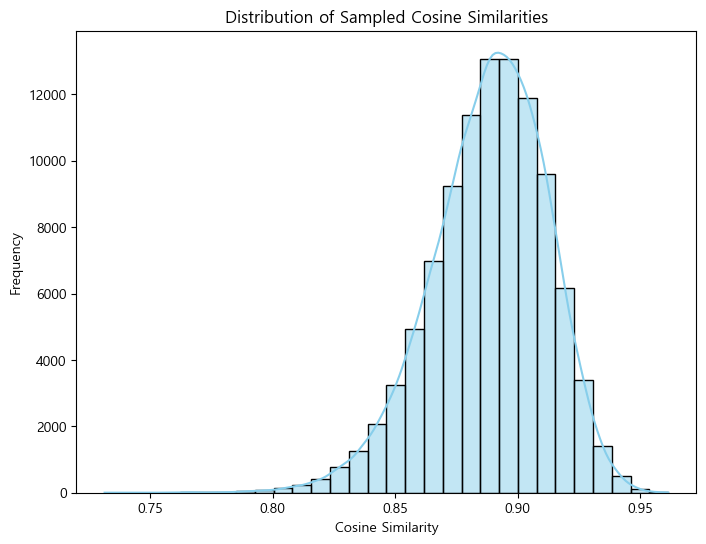

In [200]:
# 일부 유사도 값을 무작위로 추출하여 샘플링
num_samples = 100000  # 샘플링할 데이터 개수
sampled_similarity_values = []

# 무작위로 선택된 일부 유사도 값 추출
for _ in range(num_samples):
    i = np.random.randint(0, sim_matrix.shape[0])
    j = np.random.randint(0, sim_matrix.shape[1])
    sampled_similarity_values.append(sim_matrix[i, j])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(sampled_similarity_values, bins=30, kde=True, color="skyblue", edgecolor="black")

# 그래프 제목과 축 라벨 설정
plt.title("Distribution of Sampled Cosine Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [201]:
# 평균과 표준편차 계산
mean_similarity = np.mean(sampled_similarity_values)
std_similarity = np.std(sampled_similarity_values)
var_similarity = np.var(sampled_similarity_values)
# 임계값 설정
threshold = mean_similarity + 1.5 * std_similarity

print(f"평균: {mean_similarity}")
print(f"분산: {var_similarity}")
print(f"표준편차: {std_similarity}")
print(f"임계값: {threshold}")

평균: 0.8883714079856873
분산: 0.0005657902802340686
표준편차: 0.02378634735941887
임계값: 0.9240509290248156


분산이 0.0005 미만으로 값 간의 차이를 표현하기 힘들다.

##### scaled

In [230]:
scaled_matrix = (sim_matrix - np.min(sim_matrix)) / (np.max(sim_matrix) - np.min(sim_matrix))
log_transformed_matrix = np.log(scaled_matrix + 1e-6)
power_transformed_matrix = (log_transformed_matrix - np.min(log_transformed_matrix)) ** 2


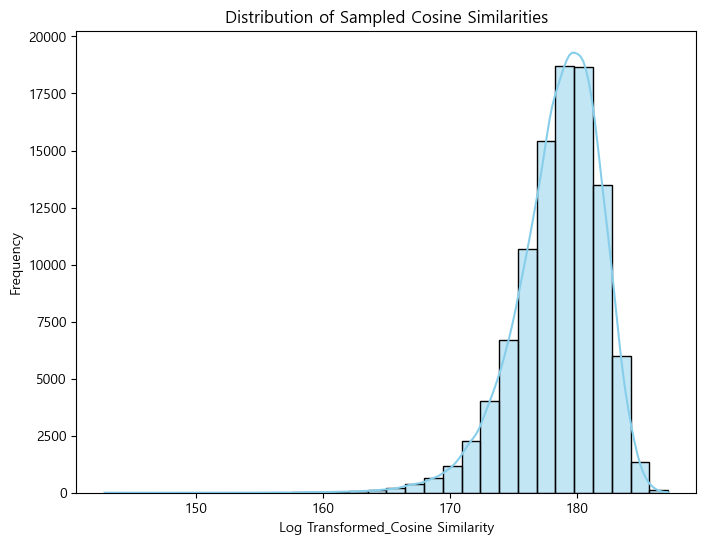

In [231]:
# 일부 유사도 값을 무작위로 추출하여 샘플링
num_samples = 100000  # 샘플링할 데이터 개수
sampled_similarity_values = []

# 무작위로 선택된 일부 유사도 값 추출
for _ in range(num_samples):
    i = np.random.randint(0, power_transformed_matrix.shape[0])
    j = np.random.randint(0, power_transformed_matrix.shape[1])
    sampled_similarity_values.append(power_transformed_matrix[i, j])

# 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(sampled_similarity_values, bins=30, kde=True, color="skyblue", edgecolor="black")

# 그래프 제목과 축 라벨 설정
plt.title("Distribution of Sampled Cosine Similarities")
plt.xlabel("Log Transformed_Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [232]:
# 평균과 표준편차 계산
mean_similarity = np.mean(sampled_similarity_values)
std_similarity = np.std(sampled_similarity_values)
var_similarity = np.var(sampled_similarity_values)
# 임계값 설정
threshold = mean_similarity + 1.5 * std_similarity

print(f"평균: {mean_similarity}")
print(f"분산: {var_similarity}")
print(f"표준편차: {std_similarity}")
print(f"임계값: {threshold}")

평균: 178.5460205078125
분산: 11.377406120300293
표준편차: 3.3730411529541016
임계값: 183.60558223724365


In [238]:
count_above_threshold = np.sum(power_transformed_matrix >= threshold + 5)
print(f"임계값 이상인 유사도 쌍의 개수: {count_above_threshold}")

임계값 이상인 유사도 쌍의 개수: 85


In [ ]:
threshold += 5

#### 임계값 이상인 노드끼리 연결

In [ ]:
df_두보['노드 라벨'] = [f'dufu_{i+1}' for i in range(len(df_두보))]
df_신위['노드 라벨'] = [f'shin_{i+1}' for i in range(len(df_신위))] 

# 그래프 초기화
G = nx.Graph()

# 두보와 신위의 각 구절을 노드로 추가 (임베딩, 제목, 본문 추가)
for _, row in df_두보.iterrows():
    G.add_node(
        row['노드 라벨'],
        title = row['제목'],
        content = row['본문_간체'],
        pyeon = row['편수'],
        shiche = row['시체'],
        embedding = row['임베딩'],
        color = 'red'
    )

for _, row in df_신위.iterrows():
    G.add_node(
        row['노드 라벨'],
        title = row['제목'],
        content = row['본문_간체'],
        pyeon = row['편수'],
        shiche = row['시체'],
        sojip = row['소집'],
        book = row['책수'],
        embedding = row['임베딩'],
        color = 'blue'
    )


In [241]:
print(len(df_두보)+len(df_신위))
print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 수: {G.number_of_edges()}")

28355
노드 수: 28355
엣지 수: 0


In [242]:
indices = np.where(power_transformed_matrix >= threshold)  

In [243]:
np.array(indices).shape

(2, 85)

In [244]:
# 임계값 이상인 두보-신위 쌍으로 노드 연결
for row, col in zip(indices[0], indices[1]):
    dufu_node = df_두보.loc[row, '노드 라벨']  # 두보 노드 라벨
    shinwhi_node = df_신위.loc[col, '노드 라벨']  # 신위 노드 라벨
    similarity = power_transformed_matrix[row, col]  # 유사도 값
    
    # 그래프에 엣지 추가 (유사도 값 속성 포함)
    G.add_edge(dufu_node, shinwhi_node, weight=similarity)

print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 개수: {G.number_of_edges()}")

노드 수: 28355
엣지 개수: 85


In [245]:
# 엣지가 없는 노드 확인
isolated_nodes = list(nx.isolates(G))
print(f"엣지가 없는 노드 수: {len(isolated_nodes)}")

엣지가 없는 노드 수: 28194


In [246]:
#엣지가 있는 노드 추출
connected_nodes = set([node for edge in G.edges for node in edge])
# 서브그래프 생성
connected_subgraph = G.subgraph(connected_nodes)

# 엣지가 없는 노드 제거
nodes_to_remove = set(G.nodes) - connected_nodes
G.remove_nodes_from(nodes_to_remove)

# 업데이트된 그래프 정보
print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 수: {G.number_of_edges()}")


노드 수: 161
엣지 수: 85


#### 시각화

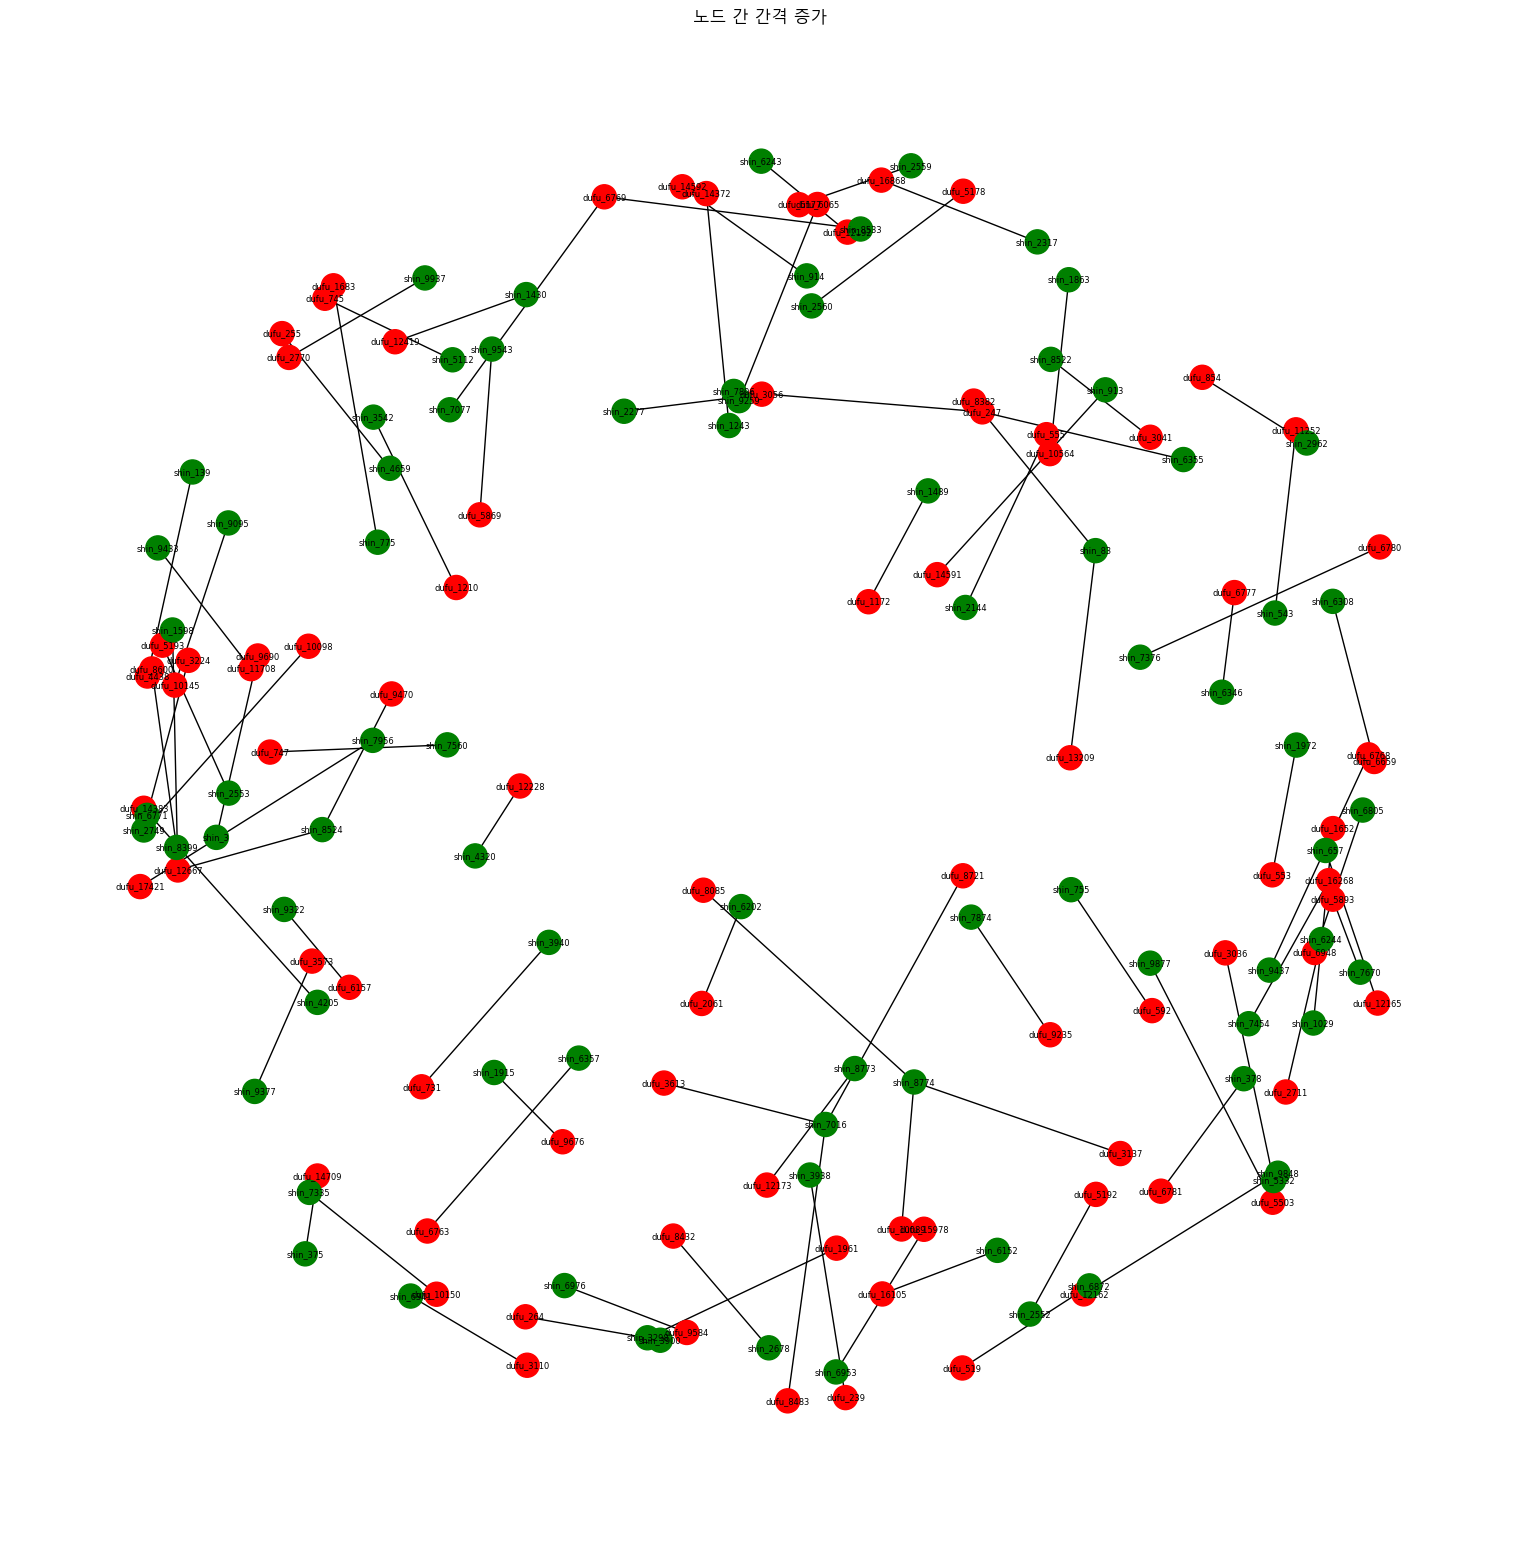

In [253]:
# 노드 간 간격 증가
pos = nx.spring_layout(G, k=2)  # 기본값보다 큰 k로 노드 간격 증가
plt.figure(figsize=(15, 15))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=['red' if 'dufu' in node else 'green' for node in G.nodes],
    node_size=300,
    font_size=6,
    edge_color="black",
    width=1  # 기본 두께 유지
)
plt.title("노드 간 간격 증가")
plt.show()


#### Node centrality V.1 : 임계값을 엄청 크게 잡음

In [289]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06)

# Create DataFrame
df_g = pd.DataFrame({
    'node_ids': list(G.nodes),
    'd_centrality': degree_centrality.values(),
    'e_centrality': eigenvector_centrality.values()
})

In [292]:
# Drop rows where the 'Node' column contains the text 'shin'
df_g = df_g[~df_g['node_ids'].str.contains("shin")]

# Reset the index after filtering (optional)
df_g = df_g.reset_index(drop=True)

###### d_centrality 젤 높은 세 개 

In [293]:
df_g.sort_values(by='d_centrality', ascending=False)

,node_ids,d_centrality,e_centrality
41,dufu_6769,0.01250,1.334824e-08
70,dufu_12667,0.01250,1.096761e-03
1,dufu_247,0.01250,1.334824e-08
44,dufu_6781,0.00625,3.974494e-20
45,dufu_6948,0.00625,3.974494e-20
...,...,...,...
26,dufu_3573,0.00625,3.974494e-20
25,dufu_3224,0.00625,3.974494e-20
24,dufu_3137,0.00625,2.886747e-01
23,dufu_3110,0.00625,3.974494e-20


In [321]:
# d_centrality 젤 높은 세 개 
target_nodes = ["dufu_6769", "dufu_12667", "dufu_247"]

# 각 대상 노드에 대해 연결된 노드 확인
connected_nodes_dict = {}
for target_node in target_nodes:
    if target_node in G:
        connected_nodes_dict[target_node] = list(G.neighbors(target_node))
    else:
        connected_nodes_dict[target_node] = None  # 노드가 그래프에 없는 경우 처리

connected_nodes_dict 


{'dufu_6769': ['shin_7077', 'shin_8533'],
 'dufu_12667': ['shin_1598', 'shin_8524'],
 'dufu_247': ['shin_6355', 'shin_7896']}

In [320]:
# 연결 정보
connections = {
    'dufu_6769': ['shin_7077', 'shin_8533'],
    'dufu_12667': ['shin_1598', 'shin_8524'],
    'dufu_247': ['shin_6355', 'shin_7896']
}

# 결과를 저장할 리스트
merged_data = []

# 각 DuFu 노드와 연결된 Shin 노드 처리
for dufu_node, shin_nodes in connections.items():
    # DuFu 노드의 데이터 가져오기
    dufu_data = df_두보.loc[df_두보['노드 라벨'] == dufu_node].iloc[0]  # 단일 행 가져오기
    
    for shin_node in shin_nodes:
        # Shin 노드의 "제목" 가져오기
        shin_data = df_신위.loc[df_신위['노드 라벨'] == shin_node].iloc[0]
        
        # 결과 병합 (DuFu 데이터에서 필요한 열만 선택)
        merged_data.append({
            '두보_node': dufu_node,
            '신위_node' : shin_node,
            '두보_시 제목': dufu_data['제목'],
            '신위_시 제목':shin_data['제목'],            
            '두보_본문': dufu_data['본문_번체'],
            '신위_본문': shin_data['본문_번체'],
            '두보_시체': dufu_data['시체'],
            '신위_시체': shin_data['시체'],
            '두보_편수': dufu_data['편수'],
            '신위_편수': shin_data['편수'],
            '신위_소집': shin_data['소집'],
            '신위_책수': shin_data['책수']
        })

# 결과를 DataFrame으로 변환
merged_df = pd.DataFrame(merged_data)

# 결과 출력
merged_df


,두보_node,신위_node,두보_시 제목,신위_시 제목,두보_본문,신위_본문,두보_시체,신위_시체,두보_편수,신위_편수,신위_소집,신위_책수
0,dufu_6769,shin_7077,戲爲六絶句,哭石閒,不廢江河萬古流,誰廢江河萬古波,7언절구,7언절구,제2수,제4수,紅蠶集三,警修堂全藁冊十二
1,dufu_6769,shin_8533,戲爲六絶句,奉,不廢江河萬古流,江河萬古至今長,7언절구,7언절구,제2수,제1수,江都錄一,警修堂全藁冊十五
2,dufu_12667,shin_1598,小至,臘日雪,冬至陽生春又來,冬至陽生到臘朝,7언장편,7언율시,제1수,제1수,蘓齋拾草,警修堂全藁冊三
3,dufu_12667,shin_8524,小至,冬至,冬至陽生春又來,一陽冬至日,7언장편,5언율시,제1수,제1수,江都錄一,警修堂全藁冊十五
4,dufu_247,shin_6355,春日憶李白,醒叟再答余詩。重致意於替年皷篋槐市之緣。更此酬謝。聞醒叟北歸。尙僑寓仁川恓惶。殊可念也。第二...,白也詩無敵,同時白也詩無敵,5언율시,7언절구,제1수,제6수,花徑賸墨十,警修堂全藁冊十一
5,dufu_247,shin_7896,春日憶李白,翠微副使歸示錢金粟學士,白也詩無敵,難言白也詩無敵,5언율시,7언절구,제1수,제4수,倉鼠存藁二,警修堂全藁冊十四


##### eigen centrality

In [332]:
# 사후 분석 결과 6개만 그나마 유의미한 수치
df_g.sort_values(by='e_centrality', ascending=False).head(6)

,node_ids,d_centrality,e_centrality
46,dufu_8085,0.00625,0.288675
49,dufu_8483,0.00625,0.288675
51,dufu_8721,0.00625,0.288675
27,dufu_3613,0.00625,0.288675
57,dufu_10089,0.00625,0.288675
24,dufu_3137,0.00625,0.288675


In [ ]:
# e_centrality 젤 높은 6개 
target_nodes = ["dufu_8085", "dufu_8483", "dufu_8721","dufu_3613","dufu_10089","dufu_3137"]

# 각 대상 노드에 대해 연결된 노드 확인
connected_nodes_dict = {}
for target_node in target_nodes:
    if target_node in G:
        connected_nodes_dict[target_node] = list(G.neighbors(target_node))
    else:
        connected_nodes_dict[target_node] = None  # 노드가 그래프에 없는 경우 처리

connected_nodes_dict 


{'dufu_8085': ['shin_8774'],
 'dufu_8483': ['shin_7016'],
 'dufu_8721': ['shin_7016'],
 'dufu_3613': ['shin_7016'],
 'dufu_10089': ['shin_8774'],
 'dufu_3137': ['shin_8774']}

In [335]:
merged_data = []

# 각 DuFu 노드와 연결된 Shin 노드 처리
for dufu_node, shin_nodes in connected_nodes_dict .items():
    # DuFu 노드의 데이터 가져오기
    dufu_data = df_두보.loc[df_두보['노드 라벨'] == dufu_node].iloc[0]  # 단일 행 가져오기
    
    for shin_node in shin_nodes:
        # Shin 노드의 "제목" 가져오기
        shin_data = df_신위.loc[df_신위['노드 라벨'] == shin_node].iloc[0]
        
        # 결과 병합 (DuFu 데이터에서 필요한 열만 선택)
        merged_data.append({
            '두보_node': dufu_node,
            '신위_node' : shin_node,
            '두보_시 제목': dufu_data['제목'],
            '신위_시 제목':shin_data['제목'],            
            '두보_본문': dufu_data['본문_번체'],
            '신위_본문': shin_data['본문_번체'],
            '두보_시체': dufu_data['시체'],
            '신위_시체': shin_data['시체'],
            '두보_편수': dufu_data['편수'],
            '신위_편수': shin_data['편수'],
            '신위_소집': shin_data['소집'],
            '신위_책수': shin_data['책수']
        })

# 결과를 DataFrame으로 변환
merged_df = pd.DataFrame(merged_data)

# 결과 출력
merged_df

,두보_node,신위_node,두보_시 제목,신위_시 제목,두보_본문,신위_본문,두보_시체,신위_시체,두보_편수,신위_편수,신위_소집,신위_책수
0,dufu_8085,shin_8774,早花,題藕花老人綠波雜記,不見一人來,不見訥人三十年,5언율시,7언절구,제1수,제7수,江都錄二,警修堂全藁冊十五
1,dufu_8483,shin_7016,南池,是歲十月之望。太倉令朴綾州。招同醒仙侍郞。,平生江海興,平生江海客,5언장편,5언율시,제1수,제10수,紅蠶集三,警修堂全藁冊十二
2,dufu_8721,shin_7016,破船,是歲十月之望。太倉令朴綾州。招同醒仙侍郞。,平生江海心,平生江海客,5언장편,5언율시,제1수,제10수,紅蠶集三,警修堂全藁冊十二
3,dufu_3613,shin_7016,洗兵行 [收京後作],是歲十月之望。太倉令朴綾州。招同醒仙侍郞。,張公一生江海客,平生江海客,7언장편,5언율시,제1수,제10수,紅蠶集三,警修堂全藁冊十二
4,dufu_10089,shin_8774,寄岑嘉州 [州據蜀江外],題藕花老人綠波雜記,不見故人十年餘,不見訥人三十年,7언장편,7언절구,제1수,제7수,江都錄二,警修堂全藁冊十五
5,dufu_3137,shin_8774,因許八奉寄江寧旻上人,題藕花老人綠波雜記,不見旻公三十年,不見訥人三十年,7언율시,7언절구,제1수,제7수,江都錄二,警修堂全藁冊十五


#### Node centrality V.2 : 임계값 작게 설정

##### 임계값 재설정

In [347]:
# 임계값 초기화
threshold = mean_similarity + 1.5 * std_similarity

count_above_threshold = np.sum(power_transformed_matrix >= threshold+4); count_above_threshold

1074

In [348]:
threshold += 4

In [349]:
df_두보['노드 라벨'] = [f'dufu_{i+1}' for i in range(len(df_두보))]
df_신위['노드 라벨'] = [f'shin_{i+1}' for i in range(len(df_신위))] 

# 그래프 초기화
G = nx.Graph()

# 두보와 신위의 각 구절을 노드로 추가 (임베딩, 제목, 본문 추가)
for _, row in df_두보.iterrows():
    G.add_node(
        row['노드 라벨'],
        title = row['제목'],
        content = row['본문_간체'],
        pyeon = row['편수'],
        shiche = row['시체'],
        embedding = row['임베딩'],
        color = 'red'
    )

for _, row in df_신위.iterrows():
    G.add_node(
        row['노드 라벨'],
        title = row['제목'],
        content = row['본문_간체'],
        pyeon = row['편수'],
        shiche = row['시체'],
        sojip = row['소집'],
        book = row['책수'],
        embedding = row['임베딩'],
        color = 'blue'
    )

In [350]:
indices = np.where(power_transformed_matrix >= threshold)  

# 임계값 이상인 두보-신위 쌍으로 노드 연결
for row, col in zip(indices[0], indices[1]):
    dufu_node = df_두보.loc[row, '노드 라벨']  # 두보 노드 라벨
    shinwhi_node = df_신위.loc[col, '노드 라벨']  # 신위 노드 라벨
    similarity = power_transformed_matrix[row, col]  # 유사도 값
    
    # 그래프에 엣지 추가 (유사도 값 속성 포함)
    G.add_edge(dufu_node, shinwhi_node, weight=similarity)

print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 개수: {G.number_of_edges()}")

노드 수: 28355
엣지 개수: 1074


In [351]:
# 엣지가 없는 노드 확인
isolated_nodes = list(nx.isolates(G))
print(f"엣지가 없는 노드 수: {len(isolated_nodes)}")

#엣지가 있는 노드 추출
connected_nodes = set([node for edge in G.edges for node in edge])
# 서브그래프 생성
connected_subgraph = G.subgraph(connected_nodes)

# 엣지가 없는 노드 제거
nodes_to_remove = set(G.nodes) - connected_nodes
G.remove_nodes_from(nodes_to_remove)

# 업데이트된 그래프 정보
print(f"노드 수: {G.number_of_nodes()}")
print(f"엣지 수: {G.number_of_edges()}")


엣지가 없는 노드 수: 26599
노드 수: 1756
엣지 수: 1074


##### d_centrality

In [352]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06)

# Create DataFrame
df_g = pd.DataFrame({
    'node_ids': list(G.nodes),
    'd_centrality': degree_centrality.values(),
    'e_centrality': eigenvector_centrality.values()})

In [353]:
# Drop rows where the 'Node' column contains the text 'shin'
df_g = df_g[~df_g['node_ids'].str.contains("shin")]

# Reset the index after filtering (optional)
df_g = df_g.reset_index(drop=True)
df_g.sort_values(by='d_centrality', ascending=False)

,node_ids,d_centrality,e_centrality
163,dufu_3076,0.002849,8.101577e-07
270,dufu_5219,0.002849,3.984402e-01
557,dufu_10089,0.002849,3.599113e-01
593,dufu_11031,0.002279,1.761128e-07
189,dufu_3451,0.002279,6.201533e-05
...,...,...,...
327,dufu_6094,0.000570,6.221179e-16
328,dufu_6134,0.000570,6.221179e-16
329,dufu_6150,0.000570,6.221179e-16
330,dufu_6151,0.000570,1.050749e-06


In [362]:
# d_centrality 젤 높은 세 개 
target_nodes = ["dufu_3076", "dufu_5219", "dufu_10089"]

# 각 대상 노드에 대해 연결된 노드 확인
connected_nodes_dict = {}
for target_node in target_nodes:
    if target_node in G:
        connected_nodes_dict[target_node] = list(G.neighbors(target_node))
    else:
        connected_nodes_dict[target_node] = None  # 노드가 그래프에 없는 경우 처리

connected_nodes_dict 

{'dufu_3076': ['shin_7948',
  'shin_8809',
  'shin_9219',
  'shin_9345',
  'shin_9774'],
 'dufu_5219': ['shin_3581',
  'shin_6015',
  'shin_7509',
  'shin_8191',
  'shin_8774'],
 'dufu_10089': ['shin_3581',
  'shin_6015',
  'shin_7817',
  'shin_8774',
  'shin_9532']}

In [363]:
merged_data = []

# 각 DuFu 노드와 연결된 Shin 노드 처리
for dufu_node, shin_nodes in connected_nodes_dict .items():
    # DuFu 노드의 데이터 가져오기
    dufu_data = df_두보.loc[df_두보['노드 라벨'] == dufu_node].iloc[0]  # 단일 행 가져오기
    
    for shin_node in shin_nodes:
        # Shin 노드의 "제목" 가져오기
        shin_data = df_신위.loc[df_신위['노드 라벨'] == shin_node].iloc[0]
        
        # 결과 병합 (DuFu 데이터에서 필요한 열만 선택)
        merged_data.append({
            '두보_node': dufu_node,
            '신위_node' : shin_node,
            '두보_시 제목': dufu_data['제목'],
            '신위_시 제목':shin_data['제목'],            
            '두보_본문': dufu_data['본문_번체'],
            '신위_본문': shin_data['본문_번체'],
            '두보_시체': dufu_data['시체'],
            '신위_시체': shin_data['시체'],
            '두보_편수': dufu_data['편수'],
            '신위_편수': shin_data['편수'],
            '신위_소집': shin_data['소집'],
            '신위_책수': shin_data['책수']
        })

# 결과를 DataFrame으로 변환
merged_df = pd.DataFrame(merged_data)

# 결과 출력
merged_df

,두보_node,신위_node,두보_시 제목,신위_시 제목,두보_본문,신위_본문,두보_시체,신위_시체,두보_편수,신위_편수,신위_소집,신위_책수
0,dufu_3076,shin_7948,曲江陪鄭八丈南史飮,菩提子數珠,此身那得更無家,此間大有歸依地,7언율시,7언율시,제1수,제1수,倉鼠存藁二,警修堂全藁冊十四
1,dufu_3076,shin_8809,曲江陪鄭八丈南史飮,成侍中墓,此身那得更無家,有歸除此更無鄕,7언율시,7언율시,제1수,제3수,九十九菴吟藁一,警修堂全藁冊十五
2,dufu_3076,shin_9219,曲江陪鄭八丈南史飮,錦舲臨歲見憶詩。有公勿遽歸吾且住之句。故,此身那得更無家,此身安處是吾家,7언율시,7언율시,제1수,제1수,蓉涇小草二,警修堂全藁冊十六
3,dufu_3076,shin_9345,曲江陪鄭八丈南史飮,晝寑夢遊仙扃得句。云綠陰如水鶯聲滑。芳草,此身那得更無家,人生何處不無聊,7언율시,7언율시,제1수,제1수,北禪院續稿一,警修堂全藁冊十七
4,dufu_3076,shin_9774,曲江陪鄭八丈南史飮,小樂府,此身那得更無家,此身能有幾多身,7언율시,7언절구,제1수,제39수,北禪院續藁三,警修堂全藁冊十七
5,dufu_5219,shin_3581,乾元中寓居同谷縣作歌 七首,西江,十年不見來何時,不見西湖二十年,7언장편,7언절구,제4수,제1수,碧蘆舫藁二,警修堂全藁冊七
6,dufu_5219,shin_6015,乾元中寓居同谷縣作歌 七首,咸陽盧允之,十年不見來何時,卅年不見玉川生,7언장편,7언율시,제4수,제1수,花徑賸墨八,警修堂全藁冊十一
7,dufu_5219,shin_7509,乾元中寓居同谷縣作歌 七首,往在甲申夏四月。鶴山過余言。三十年前。夢見,十年不見來何時,三十年來記不明,7언장편,7언절구,제4수,제1수,紅蠶集五,警修堂全藁冊十三
8,dufu_5219,shin_8191,乾元中寓居同谷縣作歌 七首,送李婦洪鄕。作八十韻,十年不見來何時,此行何時復,7언장편,5언장편,제4수,제1수,詩夢室小草一,警修堂全藁冊十四
9,dufu_5219,shin_8774,乾元中寓居同谷縣作歌 七首,題藕花老人綠波雜記,十年不見來何時,不見訥人三十年,7언장편,7언절구,제4수,제7수,江都錄二,警修堂全藁冊十五


In [364]:
merged_df.to_csv('d-중심성분석 유의미 결과.csv',encoding='utf-8-sig',index=False)

#### eigen centrality


In [ ]:
df_g.sort_values(by='e_centrality', ascending=False)

,node_ids,d_centrality,e_centrality
270,dufu_5219,0.002849,3.984402e-01
557,dufu_10089,0.002849,3.599113e-01
171,dufu_3137,0.002279,3.594999e-01
820,dufu_16275,0.001709,1.384431e-01
906,dufu_18178,0.001709,1.201003e-01
...,...,...,...
530,dufu_9458,0.000570,6.221179e-16
529,dufu_9411,0.000570,6.221179e-16
528,dufu_9392,0.000570,6.221179e-16
527,dufu_9369,0.000570,6.221179e-16


In [368]:
# e_centrality 젤 높은 6개 
target_nodes = ["dufu_5219","dufu_10089","dufu_3137"]

# 각 대상 노드에 대해 연결된 노드 확인
connected_nodes_dict = {}
for target_node in target_nodes:
    if target_node in G:
        connected_nodes_dict[target_node] = list(G.neighbors(target_node))
    else:
        connected_nodes_dict[target_node] = None  # 노드가 그래프에 없는 경우 처리

connected_nodes_dict 


{'dufu_5219': ['shin_3581',
  'shin_6015',
  'shin_7509',
  'shin_8191',
  'shin_8774'],
 'dufu_10089': ['shin_3581',
  'shin_6015',
  'shin_7817',
  'shin_8774',
  'shin_9532'],
 'dufu_3137': ['shin_3581', 'shin_6015', 'shin_7509', 'shin_8774']}

In [369]:
merged_data = []

# 각 DuFu 노드와 연결된 Shin 노드 처리
for dufu_node, shin_nodes in connected_nodes_dict .items():
    # DuFu 노드의 데이터 가져오기
    dufu_data = df_두보.loc[df_두보['노드 라벨'] == dufu_node].iloc[0]  # 단일 행 가져오기
    
    for shin_node in shin_nodes:
        # Shin 노드의 "제목" 가져오기
        shin_data = df_신위.loc[df_신위['노드 라벨'] == shin_node].iloc[0]
        
        # 결과 병합 (DuFu 데이터에서 필요한 열만 선택)
        merged_data.append({
            '두보_node': dufu_node,
            '신위_node' : shin_node,
            '두보_시 제목': dufu_data['제목'],
            '신위_시 제목':shin_data['제목'],            
            '두보_본문': dufu_data['본문_번체'],
            '신위_본문': shin_data['본문_번체'],
            '두보_시체': dufu_data['시체'],
            '신위_시체': shin_data['시체'],
            '두보_편수': dufu_data['편수'],
            '신위_편수': shin_data['편수'],
            '신위_소집': shin_data['소집'],
            '신위_책수': shin_data['책수']
        })

# 결과를 DataFrame으로 변환
merged_df = pd.DataFrame(merged_data)

# 결과 출력
merged_df

,두보_node,신위_node,두보_시 제목,신위_시 제목,두보_본문,신위_본문,두보_시체,신위_시체,두보_편수,신위_편수,신위_소집,신위_책수
0,dufu_5219,shin_3581,乾元中寓居同谷縣作歌 七首,西江,十年不見來何時,不見西湖二十年,7언장편,7언절구,제4수,제1수,碧蘆舫藁二,警修堂全藁冊七
1,dufu_5219,shin_6015,乾元中寓居同谷縣作歌 七首,咸陽盧允之,十年不見來何時,卅年不見玉川生,7언장편,7언율시,제4수,제1수,花徑賸墨八,警修堂全藁冊十一
2,dufu_5219,shin_7509,乾元中寓居同谷縣作歌 七首,往在甲申夏四月。鶴山過余言。三十年前。夢見,十年不見來何時,三十年來記不明,7언장편,7언절구,제4수,제1수,紅蠶集五,警修堂全藁冊十三
3,dufu_5219,shin_8191,乾元中寓居同谷縣作歌 七首,送李婦洪鄕。作八十韻,十年不見來何時,此行何時復,7언장편,5언장편,제4수,제1수,詩夢室小草一,警修堂全藁冊十四
4,dufu_5219,shin_8774,乾元中寓居同谷縣作歌 七首,題藕花老人綠波雜記,十年不見來何時,不見訥人三十年,7언장편,7언절구,제4수,제7수,江都錄二,警修堂全藁冊十五
5,dufu_10089,shin_3581,寄岑嘉州 [州據蜀江外],西江,不見故人十年餘,不見西湖二十年,7언장편,7언절구,제1수,제1수,碧蘆舫藁二,警修堂全藁冊七
6,dufu_10089,shin_6015,寄岑嘉州 [州據蜀江外],咸陽盧允之,不見故人十年餘,卅年不見玉川生,7언장편,7언율시,제1수,제1수,花徑賸墨八,警修堂全藁冊十一
7,dufu_10089,shin_7817,寄岑嘉州 [州據蜀江外],悼亡,不見故人十年餘,不見當年結髮人,7언장편,7언절구,제1수,제3수,倉鼠存藁[一],警修堂全藁冊十三
8,dufu_10089,shin_8774,寄岑嘉州 [州據蜀江外],題藕花老人綠波雜記,不見故人十年餘,不見訥人三十年,7언장편,7언절구,제1수,제7수,江都錄二,警修堂全藁冊十五
9,dufu_10089,shin_9532,寄岑嘉州 [州據蜀江外],梅花三十六詠,不見故人十年餘,云何不見故人書,7언장편,7언절구,제1수,제13수,北禪院續藁三,警修堂全藁冊十七


In [370]:
merged_df.to_csv('eigenvector-centrality 유의미 결과.csv',encoding='utf-8-sig',index=False)